<a href="https://colab.research.google.com/github/Harini0309/Dairy_Analysis/blob/main/20AD015_HARINI_S_FDS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:

h=pd.read_csv('/content/drive/MyDrive/Milk Grading (1).csv')

In [ ]:

h

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,0.5
1055,6.7,38,1,0,1,0,255,1.0
1056,3.0,40,1,1,1,1,255,0.0
1057,6.8,43,1,0,1,0,250,1.0


In [ ]:
h.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5
5,6.6,37,1,1,1,1,255,1.0
6,5.5,45,1,0,1,1,250,0.0
7,4.5,60,0,1,1,1,250,0.0
8,8.1,66,1,0,1,1,255,0.0
9,6.7,45,1,1,0,0,247,0.5


In [ ]:
h.tail(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1049,6.5,37,0,0,0,0,255,0.5
1050,6.6,37,1,1,1,1,255,1.0
1051,5.5,45,1,0,1,1,250,0.0
1052,6.5,40,1,0,0,0,250,0.5
1053,8.1,66,1,0,1,1,255,0.0
1054,6.7,45,1,1,0,0,247,0.5
1055,6.7,38,1,0,1,0,255,1.0
1056,3.0,40,1,1,1,1,255,0.0
1057,6.8,43,1,0,1,0,250,1.0
1058,8.6,55,0,1,1,1,255,0.0


In [ ]:
h.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.418319
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.393934
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,0.500000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.500000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


In [ ]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 66.3 KB


In [ ]:
h.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [ ]:
h.size

8472

In [ ]:
h.shape

(1059, 8)

In [ ]:
h.count

<bound method DataFrame.count of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254    1.0
1     6.6          36      0     1     0          1     253    1.0
2     8.5          70      1     1     1          1     246    0.0
3     9.5          34      1     1     0          1     255    0.0
4     6.6          37      0     0     0          0     255    0.5
...   ...         ...    ...   ...   ...        ...     ...    ...
1054  6.7          45      1     1     0          0     247    0.5
1055  6.7          38      1     0     1          0     255    1.0
1056  3.0          40      1     1     1          1     255    0.0
1057  6.8          43      1     0     1          0     250    1.0
1058  8.6          55      0     1     1          1     255    0.0

[1059 rows x 8 columns]>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(h)
scaled_data = scalar.transform(h)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(1059, 2)

In [ ]:
X = h['pH'].values
Y = h['Colour'].values

In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print("mean of input",mean_x)
print("mean of target",mean_y)

mean of input 6.630122757318224
mean of target 251.84041548630785


In [ ]:
m = len(X)
numer = 0
denom = 0
for i in range(m):
      numer+= (X[i] - mean_x) * (Y[i] - mean_y)
      denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
print (f'm = {m} \nc = {c}')

m = -0.5064382326157326 
c = 255.19816313754944


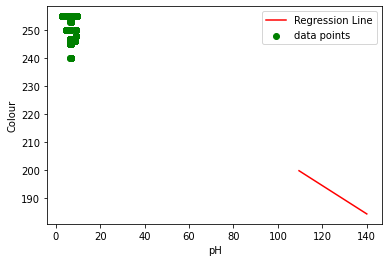

In [ ]:
max_x = np.max(X) + 100
min_x = np.min(Y) - 100
x = np.linspace (min_x, max_x, 100)
y = c + m * x
plt.plot(x, y, color='red', label='Regression Line')
plt.scatter(X, Y, c='green', label='data points')
plt.xlabel('pH')
plt.ylabel('Colour')
plt.legend()
plt.show()

In [ ]:
X = h['Taste'].values
Y = h['Odor'].values

In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print("mean of input",mean_x)
print("mean of target",mean_y)

mean of input 0.546742209631728
mean of target 0.43248347497639283


In [ ]:
m = len(X)
numer = 0
denom = 0
for i in range(m):
      numer+= (X[i] - mean_x) * (Y[i] - mean_y)
      denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
print (f'm = {m} \nc = {c}')

m = 0.01749784110535384 
c = 0.4229166666666668


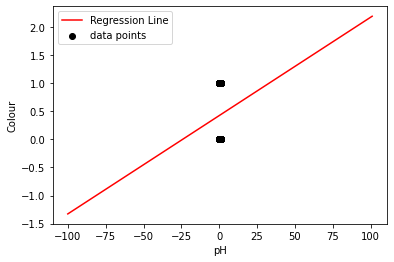

In [ ]:
max_x = np.max(X) + 100
min_x = np.min(Y) - 100
x = np.linspace (min_x, max_x, 100)
y = c + m * x
plt.plot(x, y, color='red', label='Regression Line')
plt.scatter(X, Y, c='black', label='data points')
plt.xlabel('pH')
plt.ylabel('Colour')
plt.legend()
plt.show()

In [ ]:
X = h['Grade'].values
Y = h['pH'].values

In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print("mean of input",mean_x)
print("mean of target",mean_y)

mean of input 0.4183191690273843
mean of target 6.630122757318224


In [ ]:
m = len(X)
numer = 0
denom = 0
for i in range(m):
      numer+= (X[i] - mean_x) * (Y[i] - mean_y)
      denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
print (f'm = {m} \nc = {c}')

m = 0.10296713377408057 
c = 6.58704963148072


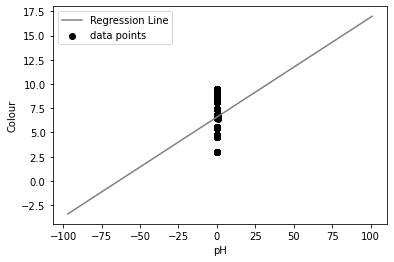

In [ ]:
max_x = np.max(X) + 100
min_x = np.min(Y) - 100
x = np.linspace (min_x, max_x, 100)
y = c + m * x
plt.plot(x, y, color='grey', label='Regression Line')
plt.scatter(X, Y, c='black', label='data points')
plt.xlabel('pH')
plt.ylabel('Colour')
plt.legend()
plt.show()

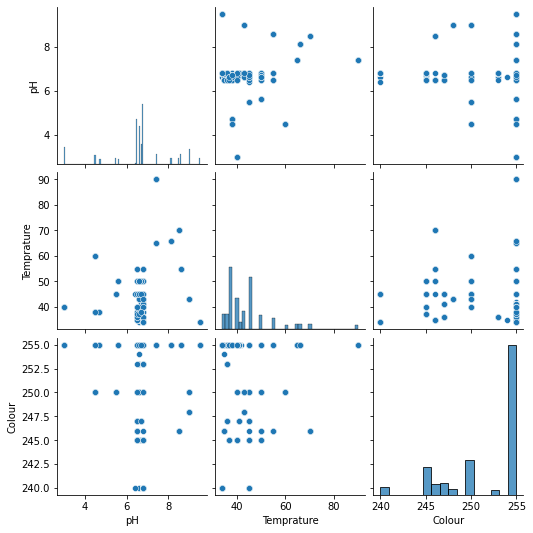

In [ ]:
sns.pairplot(h[['pH','Temprature','Colour']])
plt.show()

In [ ]:
import sklearn.cluster as cluster
k_model=cluster.KMeans(n_clusters=5, init="k-means++")
k_model=k_model.fit(h[['pH','Temprature','Colour']])

In [ ]:
k_model.cluster_centers_

array([[  6.11751969,  38.80511811, 254.91141732],
       [  7.26976744,  65.51162791, 251.65116279],
       [  7.00568182,  42.38352273, 246.71306818],
       [  7.4       ,  90.        , 255.        ],
       [  7.25625   ,  52.5       , 254.        ]])

In [ ]:
k_model.labels_

array([0, 0, 1, ..., 0, 2, 4], dtype=int32)

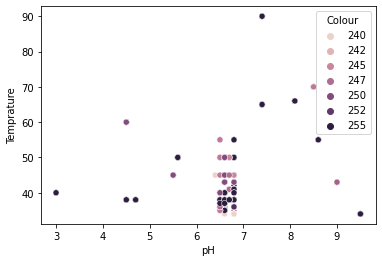

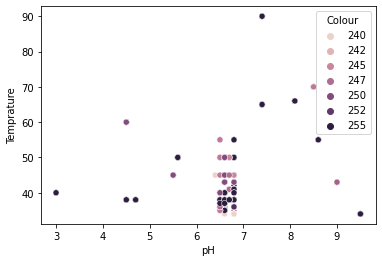

In [ ]:
sns.scatterplot(x="pH", y="Temprature", hue="Colour", data=h)

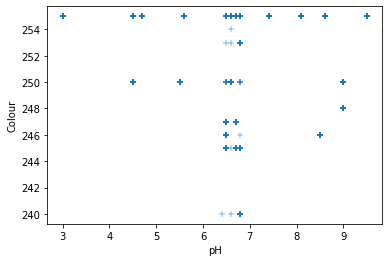

In [ ]:
sns.scatterplot(x='pH', y='Colour', data=h, marker="+")